# PREAMBLE
#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_hmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,8.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_cmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (12.,12.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#dfc27d', '#a6611a']
palette_inv = ['#a6611a', '#dfc27d']

# Functions

In [3]:
def standardization(variable):
    """
    :param variable: the array with the variables you wish to standardize
    :return: standardized array
    """
    var_average = np.average(variable)
    var_std     = np.std(variable)
    new_variable = []
    for i in range(variable.size):
        new_variable_i = (variable[i] - var_average)/var_std
        new_variable.append(new_variable_i)
    new_variable = np.array(new_variable)
    return new_variable

# Libraries

In [4]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import os
import sklearn.preprocessing as pp
import scipy.stats           as s
from textwrap import wrap

In [5]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [6]:
psmed_data_magphys = pd.read_csv(os.path.join(psm_path, 'uv_redseq_psmed_oneneighbor_magphys.csv'))

In [7]:
dust_data = pd.read_csv('../../Match/ALL_GAMA_MAGPHYS_SELECTED.csv')

In [8]:
mass_frac = dust_data['mass_dust_best_fit']/(dust_data['mass_stellar_best_fit']+dust_data['mass_dust_best_fit'])

In [9]:
duspedia_ratio = np.log10(dust_data['mass_stellar_best_fit'].values/dust_data['mass_dust_best_fit'].values)

In [10]:
dust_data['mass_fraction'] = mass_frac
dust_data['log_mdust/mstar'] = duspedia_ratio

In [11]:
new_match = psmed_data_magphys.merge(dust_data, on=['CATAID'], how='left', indicator=True)

In [12]:
new_match

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile97_5_y,mass_dust_best_fit_y,mass_dust_percentile2_5_y,mass_dust_percentile16_y,mass_dust_percentile50_y,mass_dust_percentile84_y,mass_dust_percentile97_5_y,mass_fraction,log_mdust/mstar,_merge
0,594994,588848899931439415,222.9286,-0.152468,3.50,4.62,20.6537,0.0385,2,19.4048,...,9.992,1088000.0,5.857,6.292,6.707,7.132,7.482,0.000017,4.771987,both
1,600232,588848900429578535,134.3863,0.325479,3.50,4.62,22.1271,0.1172,0,19.6814,...,10.010,6546000.0,5.802,6.357,6.812,7.202,7.527,0.000196,3.707120,both
2,609836,588848900448452756,177.4558,0.352174,3.50,4.62,21.1312,0.0543,2,19.1966,...,9.902,1228000.0,6.002,6.327,6.657,7.022,7.362,0.000036,4.438174,both
3,610293,588848900449370284,179.6213,0.360711,3.50,5.28,21.0113,0.0503,0,19.4856,...,10.720,27360000.0,7.337,7.372,7.417,7.467,7.532,0.001706,2.767275,both
4,610441,588848900449632462,180.2054,0.211046,3.50,4.62,99.0000,99.0000,2,19.6212,...,10.430,40370000.0,6.192,6.757,7.287,7.722,8.052,0.000287,3.541618,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,145244,587724650869227683,183.6240,-1.323914,3.50,4.62,20.9746,0.0587,2,19.3470,...,9.682,1736000.0,5.552,6.017,6.427,6.842,7.202,0.000080,4.095105,both
134,145646,587724650870079712,185.5760,-1.271044,3.65,5.28,20.5001,0.0599,2,19.1995,...,10.430,120800000.0,7.002,7.262,7.582,7.912,8.112,0.001348,2.869659,both
135,239670,587726014548934888,218.6060,1.636215,3.50,4.62,21.6036,0.1446,0,19.0099,...,10.050,6571000.0,5.992,6.562,6.947,7.297,7.587,0.000107,3.972583,both
136,240001,587726014549590290,220.0579,1.619308,3.55,4.62,21.1631,0.0964,0,19.7233,...,10.390,7559000.0,6.237,6.707,7.097,7.502,7.847,0.000058,4.237811,both


In [13]:
uv_upturn = new_match[new_match['UV_CLASS_YI2011']=='UV_UPTURN']
uv_weak   = new_match[new_match['UV_CLASS_YI2011']=='UV_WEAK']

# Blanton properties

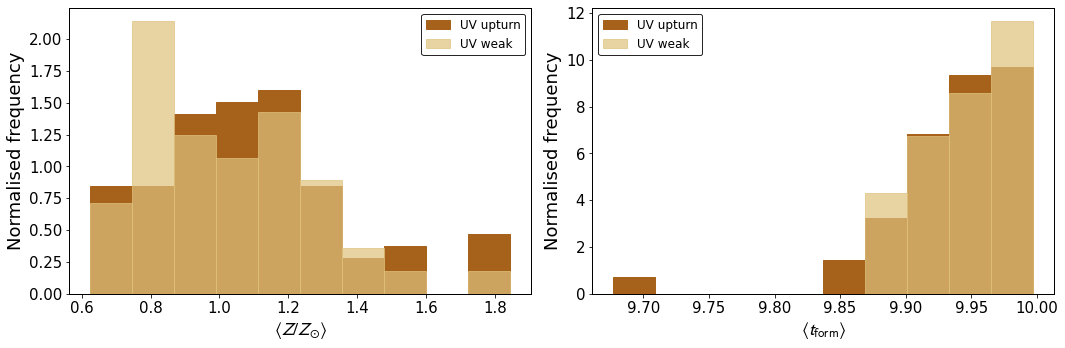

In [14]:
plt.rcParams.update(plotpars_2cols)
plt.subplot(1,2,1)
n, bins, patches = plt.hist(uv_upturn['metalicity_Z_Zo_percentile50'], color=palette[1], label='UV upturn', 
                            density=True, bins=10, edgecolor=palette[1])
plt.hist(uv_weak['metalicity_Z_Zo_percentile50'], color=palette[0], label='UV weak', density=True, bins=bins,
         alpha=0.7, 
         edgecolor=palette[0])
# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r"$\left<Z/Z_{\odot}\right>$")
plt.ylabel('Normalised frequency')


plt.subplot(1,2,2)
n, bins, patches = plt.hist(uv_upturn['tform_percentile50'], color=palette[1], label='UV upturn', density=True, 
                            bins=10, edgecolor=palette[1], alpha=1)
plt.hist(uv_weak['tform_percentile50'], color=palette[0], label='UV weak', density=True, bins=bins, alpha=0.7, 
         edgecolor=palette[0])
# plt.yscale('log')
plt.xlabel(r"$\left<t_{\rm{form}}\right>$")
plt.ylabel('Normalised frequency')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform.pdf'))
plt.show()

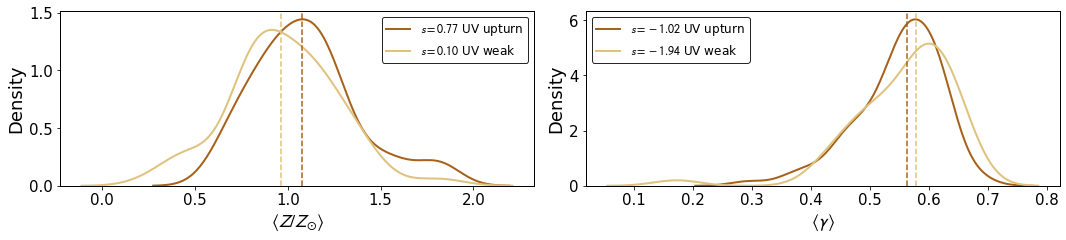

In [15]:
plt.rcParams.update(plotpars_2cols)

plt.subplots(figsize=(15,3.5))
plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['metalicity_Z_Zo_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['metalicity_Z_Zo_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['metalicity_Z_Zo_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['metalicity_Z_Zo_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['metalicity_Z_Zo_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['metalicity_Z_Zo_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left<Z/Z_{\odot}\right>$")
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['gamma_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['gamma_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['gamma_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['gamma_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['gamma_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['gamma_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \gamma \right>$")
plt.ylabel('Density')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_gamma_kernel.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_gamma_kernel.pdf'))
plt.show()

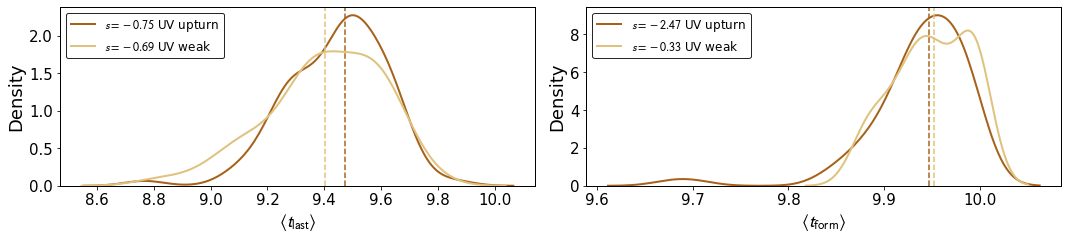

In [16]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['tlastb_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['tlastb_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['tlastb_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['tlastb_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['tlastb_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['tlastb_percentile50'].values), color=palette[0], linestyle='--')
plt.xlabel(r"$\left<t_{\rm{last}}\right>$")
plt.ylabel('Density')
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['tform_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['tform_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['tform_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['tform_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['tform_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['tform_percentile50'].values), color=palette[0], linestyle='--')
plt.xlabel(r"$\left<t_{\rm{form}}\right>$")
plt.ylabel('Density')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_tlast_tform_kernel.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_tlast_tform_kernel.pdf'))
plt.show()

In [17]:
print(np.median(uv_upturn['tlastb_percentile50'].values), np.median(uv_weak['tlastb_percentile50'].values))

9.472000000000001 9.402000000000001


In [18]:
print(10**(np.median(uv_upturn['tlastb_percentile50'].values)), 
           10**(np.median(uv_weak['tlastb_percentile50'].values)))

2964831389.5243516 2523480772.480581


In [19]:
(10**(np.median(uv_upturn['tlastb_percentile50'].values))
 -10**(np.median(uv_weak['tlastb_percentile50'].values)))/(10**9)

0.44135061704377077

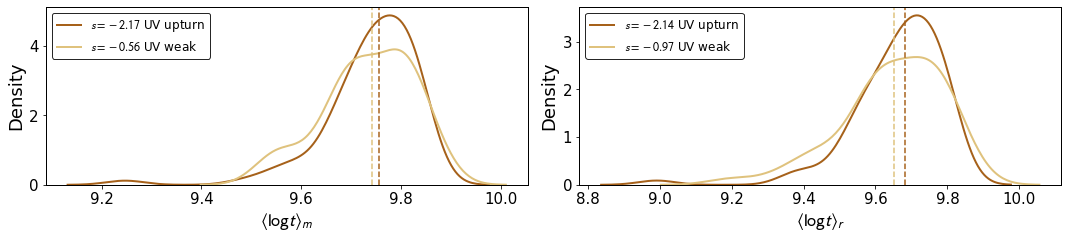

In [20]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['agem_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['agem_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['agem_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['agem_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['agem_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \log t \right>_{m}$")
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['ager_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" % 
            uv_upturn['ager_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['ager_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['ager_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['ager_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['ager_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left<\log t\right>_{r}$")
plt.ylabel('Density')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_age.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_age.pdf'))
plt.show()

In [21]:
print(np.median(uv_upturn['ager_percentile50'].values))
print(np.median(uv_weak['ager_percentile50'].values))

9.682
9.652000000000001


In [22]:
diff = 10**(np.median(uv_upturn['ager_percentile50'].values))-10**(np.median(uv_weak['ager_percentile50'].values))

In [23]:
diff/10**(9)

0.32093958516595744

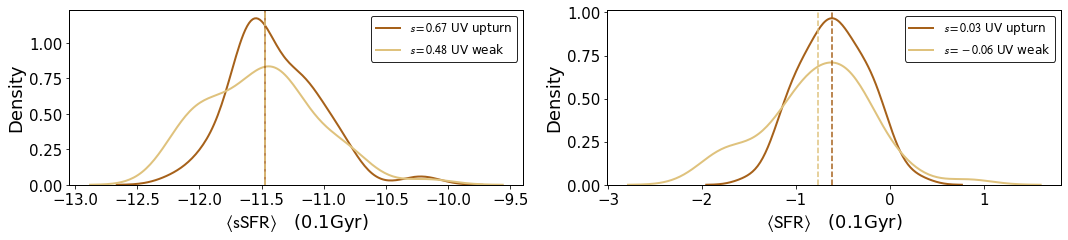

In [24]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['sSFR_0_1Gyr_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['sSFR_0_1Gyr_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sSFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='-')
plt.axvline(x=np.median(uv_weak['sSFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{sSFR} \right>$   (0.1Gyr)")
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['SFR_0_1Gyr_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['SFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['SFR_0_1Gyr_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['SFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['SFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['SFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{SFR} \right>$   (0.1Gyr)")
plt.ylabel('Density')


plt.tight_layout(w_pad=2.)
plt.savefig(os.path.join(psm_path, 'psm_magphys_ssfr_sfr.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_ssfr_sfr.pdf'))
plt.show()

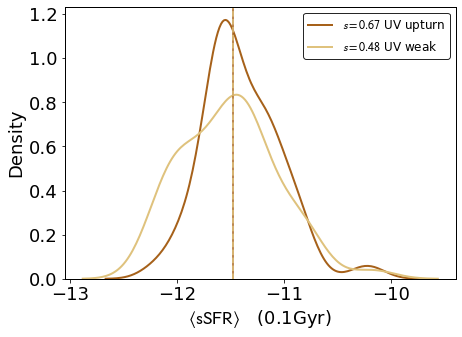

In [25]:
plt.rcParams.update(plotpars)
sns.kdeplot(uv_upturn['sSFR_0_1Gyr_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['sSFR_0_1Gyr_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sSFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='-')
plt.axvline(x=np.median(uv_weak['sSFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{sSFR} \right>$   (0.1Gyr)")
plt.ylabel('Density')
plt.show()

In [26]:
c = 0
for i in uv_upturn['sSFR_0_1Gyr_percentile50'].values:
    if i>-11.31:
        c+=1
        print(i)
print(c)

-10.17
-11.17
-11.02
-11.07
-11.17
-11.12
-11.27
-11.27
-10.97
-10.92
-10.72
-11.22
-10.82
-11.22
-11.02
-11.12
-11.17
-11.07
-10.87
-11.17
-10.87
-11.12
-10.27
-10.87
-11.02
-11.22
-10.87
-11.27
-11.27
-10.87
-11.27
-11.12
-11.27
-11.17
34


In [27]:
c = 0
for i in uv_weak['sSFR_0_1Gyr_percentile50'].values:
    if i>-11.31:
        c+=1
        print(i)
print(c)

-11.22
-10.77
-11.22
-11.27
-11.07
-11.02
-11.17
-11.27
-10.77
-10.92
-10.17
-10.77
-10.82
-10.97
-11.22
15


In [28]:
ttest_test = s.ttest_ind(a=uv_upturn['agem_percentile50'], b=uv_weak['agem_percentile50'], equal_var=False)
ttest_test

Ttest_indResult(statistic=0.39123825526653533, pvalue=0.6963911417078633)

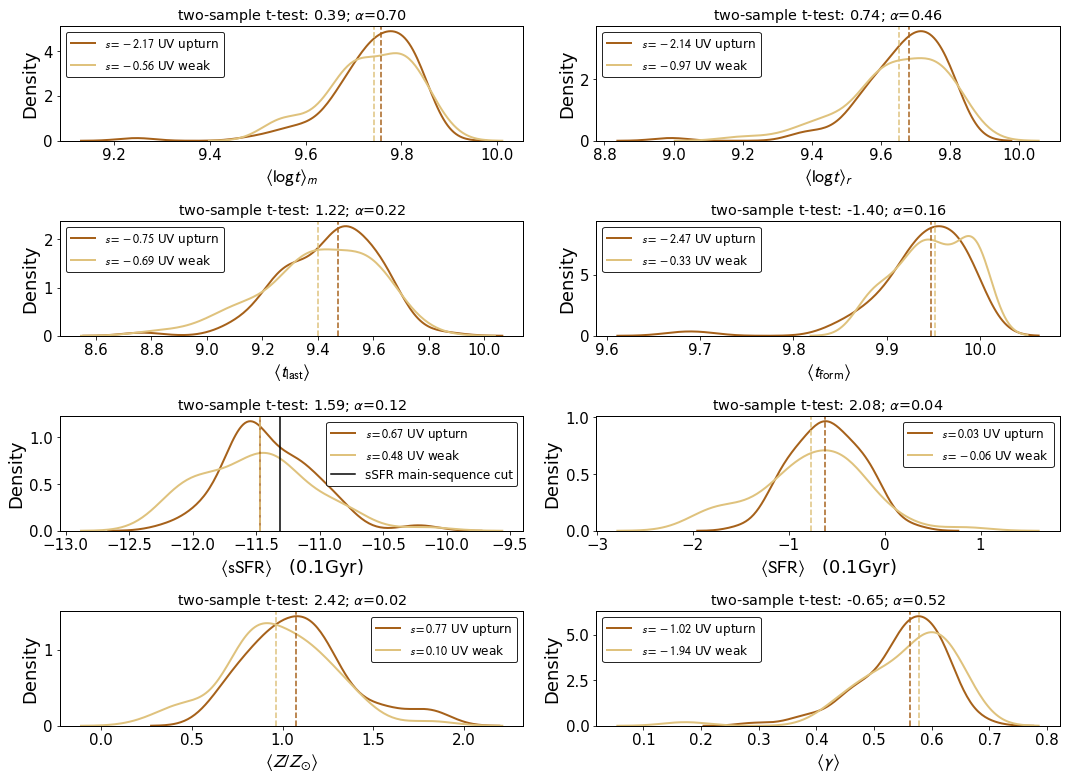

In [29]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,11))

plt.subplot(4,2,1)
sns.kdeplot(uv_upturn['agem_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['agem_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['agem_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['agem_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['agem_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['agem_percentile50'], b=uv_weak['agem_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left< \log t \right>_{m}$")
plt.ylabel('Density')


plt.subplot(4,2,2)
sns.kdeplot(uv_upturn['ager_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" % 
            uv_upturn['ager_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['ager_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['ager_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['ager_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['ager_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['ager_percentile50'], b=uv_weak['ager_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left<\log t\right>_{r}$")
# plt.ylabel('Density')

plt.subplot(4,2,3)
sns.kdeplot(uv_upturn['tlastb_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['tlastb_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['tlastb_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['tlastb_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['tlastb_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['tlastb_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['tlastb_percentile50'], b=uv_weak['tlastb_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.xlabel(r"$\left<t_{\rm{last}}\right>$")
plt.ylabel('Density')
plt.legend(loc='best')

plt.subplot(4,2,4)
sns.kdeplot(uv_upturn['tform_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['tform_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['tform_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['tform_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
ttest = s.ttest_ind(a=uv_upturn['tform_percentile50'], b=uv_weak['tform_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.axvline(x=np.median(uv_upturn['tform_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['tform_percentile50'].values), color=palette[0], linestyle='--')
plt.xlabel(r"$\left<t_{\rm{form}}\right>$")
# plt.ylabel('Density')
plt.legend(loc='best')


plt.subplot(4,2,5)
sns.kdeplot(uv_upturn['sSFR_0_1Gyr_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['sSFR_0_1Gyr_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['sSFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sSFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='-')
plt.axvline(x=np.median(uv_weak['sSFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
plt.axvline(x=-11.31, color='black', linestyle='-', label='sSFR main-sequence cut')
ttest = s.ttest_ind(a=uv_upturn['sSFR_0_1Gyr_percentile50'], b=uv_weak['sSFR_0_1Gyr_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{sSFR} \right>$   (0.1Gyr)")
plt.ylabel('Density')


plt.subplot(4,2,6)
sns.kdeplot(uv_upturn['SFR_0_1Gyr_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['SFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['SFR_0_1Gyr_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['SFR_0_1Gyr_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['SFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['SFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['SFR_0_1Gyr_percentile50'], b=uv_weak['SFR_0_1Gyr_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{SFR} \right>$   (0.1Gyr)")
# plt.ylabel('Density')

plt.subplot(4,2,7)
sns.kdeplot(uv_upturn['metalicity_Z_Zo_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['metalicity_Z_Zo_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['metalicity_Z_Zo_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['metalicity_Z_Zo_percentile50'].skew(), linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['metalicity_Z_Zo_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['metalicity_Z_Zo_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['metalicity_Z_Zo_percentile50'], b=uv_weak['metalicity_Z_Zo_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left<Z/Z_{\odot}\right>$")
plt.ylabel('Density')

plt.subplot(4,2,8)
sns.kdeplot(uv_upturn['gamma_percentile50'], color=palette[1], label=r"$s=%.2f$ UV upturn" 
            % uv_upturn['gamma_percentile50'].skew(), linewidth=2.)
sns.kdeplot(uv_weak['gamma_percentile50'], color=palette[0], label=r"$s=%.2f$ UV weak" 
            % uv_weak['gamma_percentile50'].skew(), linewidth=2.)
plt.axvline(x=np.median(uv_upturn['gamma_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['gamma_percentile50'].values), color=palette[0], linestyle='--')
ttest = s.ttest_ind(a=uv_upturn['gamma_percentile50'], b=uv_weak['gamma_percentile50'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))
plt.legend(loc='best')
plt.xlabel(r"$\left< \gamma \right>$")
# plt.ylabel('Density')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_all.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_all.pdf'))
plt.show()


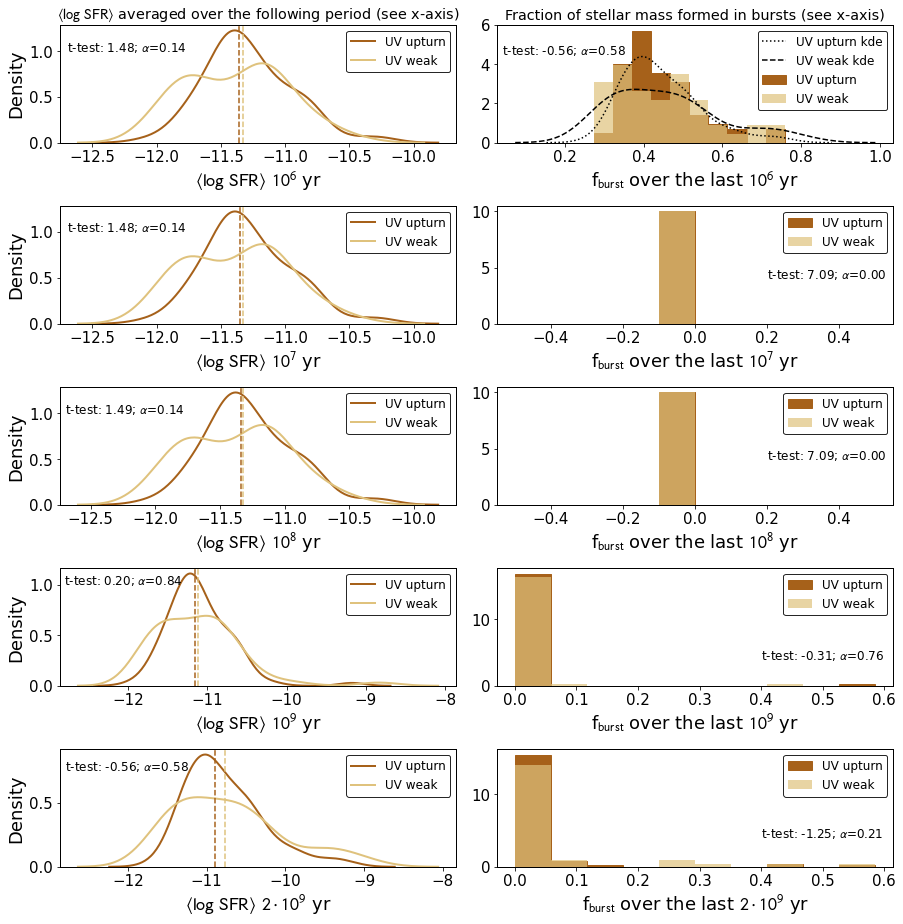

In [82]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(13, 13))

ax = plt.subplot(5,2,1)
sns.kdeplot(uv_upturn['sfr16_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr16_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr16_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr16_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< \log~ \rm{SFR} \right>$ $10^6$ yr")
plt.ylabel('Density')
plt.title(r"$\left< \log~\rm{SFR} \right>$ averaged over the following period (see x-axis)")
ttest = s.ttest_ind(a=uv_upturn['sfr16_percentile50'], b=uv_weak['sfr16_percentile50'])
plt.text(x=-12.7, y=1, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))


plt.subplot(5,2,2)
plt.title(r"Fraction of stellar mass formed in bursts (see x-axis)")
n, bins, patches = plt.hist(uv_upturn['fb16_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
sns.kdeplot(uv_upturn['fb16_percentile50'], color='black', alpha=1., label='UV upturn kde', linestyle=':')
plt.hist(uv_weak['fb16_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
sns.kdeplot(uv_weak['fb16_percentile50'], color='black', alpha=1, label='UV weak kde', linestyle='--')
plt.xlabel(r"f$_{\rm{burst}}$ over the last $10^6$ yr")
plt.ylabel('')
plt.ylim([0, 6])
plt.legend(loc='best')
ttest = s.ttest_ind(a=uv_upturn['fb16_percentile50'], b=uv_weak['fb16_percentile50'])
plt.text(x=0.04, y=4.5, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,3)
sns.kdeplot(uv_upturn['sfr17_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr17_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr17_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr17_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< \log~ \rm{SFR} \right>$ $10^7$ yr")
plt.ylabel('Density')
ttest = s.ttest_ind(a=uv_upturn['sfr17_percentile50'], b=uv_weak['sfr17_percentile50'])
plt.text(x=-12.7, y=1, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,4)
n, bins, patches = plt.hist(uv_upturn['fb17_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb17_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.legend(loc='best')
plt.xlabel(r"f$_{\rm{burst}}$ over the last $10^7$ yr")
# plt.ylabel('Density')
ttest = s.ttest_ind(a=uv_upturn['fb17_percentile50'], b=uv_weak['fb17_percentile50'])
plt.text(x=0.2, y=4, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))


plt.subplot(5,2,5)
sns.kdeplot(uv_upturn['sfr18_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr18_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr18_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr18_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< \log~ \rm{SFR} \right>$ $10^8$ yr")
plt.ylabel('Density')
ttest = s.ttest_ind(a=uv_upturn['sfr18_percentile50'], b=uv_weak['sfr18_percentile50'])
plt.text(x=-12.7, y=1, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,6)
n, bins, patches = plt.hist(uv_upturn['fb18_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb18_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{\rm{burst}}$ over the last $10^8$ yr")
# plt.ylabel('Density')
plt.legend(loc='best')
ttest = s.ttest_ind(a=uv_upturn['fb18_percentile50'], b=uv_weak['fb18_percentile50'])
plt.text(x=0.2, y=4, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,7)
sns.kdeplot(uv_upturn['sfr19_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr19_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr19_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr19_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< \log~ \rm{SFR} \right>$ $10^9$ yr")
plt.ylabel('Density')
ttest = s.ttest_ind(a=uv_upturn['sfr19_percentile50'], b=uv_weak['sfr19_percentile50'])
plt.text(x=-12.8, y=1, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,8)
n, bins, patches = plt.hist(uv_upturn['fb19_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb19_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{\rm{burst}}$ over the last $10^9$ yr")
# plt.ylabel('Density')
plt.legend(loc='best')
ttest = s.ttest_ind(a=uv_upturn['fb19_percentile50'], b=uv_weak['fb19_percentile50'])
plt.text(x=0.4, y=4, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,9)
sns.kdeplot(uv_upturn['sfr29_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr29_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr29_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr29_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< \log~ \rm{SFR} \right>$ $2\cdot 10^9$ yr")
plt.ylabel('Density')
ttest = s.ttest_ind(a=uv_upturn['sfr29_percentile50'], b=uv_weak['sfr29_percentile50'])
plt.text(x=-12.8, y=0.75, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.subplot(5,2,10)
n, bins, patches = plt.hist(uv_upturn['fb29_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb29_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{\rm{burst}}$ over the last $2 \cdot 10^9$ yr")
# plt.ylabel('Density')
plt.legend(loc='best')
ttest = s.ttest_ind(a=uv_upturn['fb29_percentile50'], b=uv_weak['fb29_percentile50'])
plt.text(x=0.4, y=4, s=r"t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]))

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_sfr_frac.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_sfr_frac.pdf'))
plt.show()

In [31]:
uv_weak['fb16_percentile50'].describe()

count    51.000000
mean      0.455676
std       0.138350
min       0.262500
25%       0.347500
50%       0.445500
75%       0.530500
max       0.799500
Name: fb16_percentile50, dtype: float64

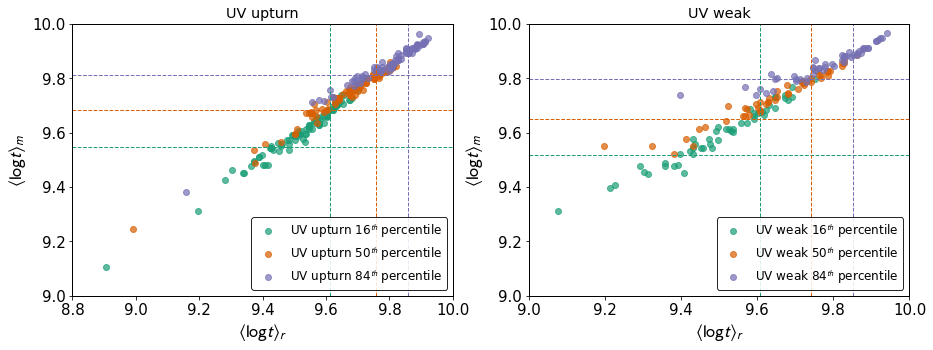

In [32]:
palette_err = ['#1b9e77','#d95f02','#7570b3']
alpha=0.7
plt.rcParams.update(plotpars_2cols)
plt.subplot(1, 2, 1)
plt.title(r"UV upturn")
plt.scatter(x=uv_upturn['ager_percentile16'], y=uv_upturn['agem_percentile16'], c=palette_err[0], alpha=alpha, 
            label=r"UV upturn 16$^{th}$ percentile")
plt.scatter(x=uv_upturn['ager_percentile50'], y=uv_upturn['agem_percentile50'], c=palette_err[1], alpha=alpha, 
            label=r"UV upturn 50$^{th}$ percentile")
plt.scatter(x=uv_upturn['ager_percentile84'], y=uv_upturn['agem_percentile84'], c=palette_err[2], alpha=alpha, 
            label=r"UV upturn 84$^{th}$ percentile")
plt.axhline(y=np.median(uv_upturn['ager_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_upturn['ager_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_upturn['ager_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.legend(loc='lower right')
plt.ylim([9., 10.])
plt.xlim([8.8, 10.])
plt.xlabel(r"$\left< \log t \right>_{r}$")
plt.ylabel(r"$\left< \log t \right>_{m}$")

plt.subplot(1, 2, 2)
plt.title(r"UV weak")
plt.scatter(x=uv_weak['ager_percentile16'], y=uv_weak['agem_percentile16'], c=palette_err[0], alpha=alpha, 
            label=r"UV weak 16$^{th}$ percentile")
plt.scatter(x=uv_weak['ager_percentile50'], y=uv_weak['agem_percentile50'], c=palette_err[1], alpha=alpha, 
            label=r"UV weak 50$^{th}$ percentile")
plt.scatter(x=uv_weak['ager_percentile84'], y=uv_weak['agem_percentile84'], c=palette_err[2], alpha=alpha, 
            label=r"UV weak 84$^{th}$ percentile")
plt.axhline(y=np.median(uv_weak['ager_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_weak['ager_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_weak['ager_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.legend(loc='lower right')
plt.ylim([9., 10.])
plt.xlim([9., 10.])
plt.xlabel(r"$\left< \log t \right>_{r}$")
plt.ylabel(r"$\left< \log t \right>_{m}$")

plt.savefig(os.path.join(psm_path, 'psm_magphys_ages_quantiles.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_ages_quantiles.pdf'))
plt.show()

In [33]:
print (np.median(uv_upturn['sSFR_0_1Gyr_percentile50'].values), 
                 np.median(uv_weak['sSFR_0_1Gyr_percentile50'].values))

-11.47 -11.47


In [34]:
uv_upturn['sSFR_0_1Gyr_percentile50'].describe()

count    87.000000
mean    -11.391839
std       0.362381
min     -12.220000
25%     -11.620000
50%     -11.470000
75%     -11.170000
max     -10.170000
Name: sSFR_0_1Gyr_percentile50, dtype: float64

In [35]:
uv_weak['sSFR_0_1Gyr_percentile50'].describe()

count    51.000000
mean    -11.502353
std       0.445850
min     -12.270000
25%     -11.870000
50%     -11.470000
75%     -11.245000
max     -10.170000
Name: sSFR_0_1Gyr_percentile50, dtype: float64

In [36]:
colours = {}
colours['CATAID']  = psmed_data_magphys['CATAID'].values
colours['FUV-NUV'] = psmed_data_magphys['MAG_AB_FUV'].values - psmed_data_magphys['MAG_AB_NUV']
colours['FUV-R'] = psmed_data_magphys['MAG_AB_FUV'].values - psmed_data_magphys['MAG_AB_R']
colours['NUV-R'] = psmed_data_magphys['MAG_AB_NUV'].values - psmed_data_magphys['MAG_AB_R']
colours = pd.DataFrame(colours)

In [37]:
heatmap_df = psmed_data_magphys[['CATAID', 'UV_CLASS_YI2011', 'mass_stellar_best_fit', 'ager_percentile50',  
                                 'metalicity_Z_Zo_percentile50', 'sSFR_0_1Gyr_percentile50', 
                                 'tform_percentile50', 'tlastb_percentile50', 'fb29_percentile50',]]

In [38]:
heatmap_df = heatmap_df.merge(colours, how='inner', on='CATAID')

In [39]:
heatmap_df

,CATAID,UV_CLASS_YI2011,mass_stellar_best_fit,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
0,594994,UV_UPTURN,6.436000e+10,9.677,1.155,-11.72,9.977,9.412,0.0005,-0.044586,6.501088,6.545674
1,600232,UV_UPTURN,3.335000e+10,9.772,0.705,-11.62,9.977,9.512,0.0005,0.004124,5.478230,5.474106
2,609836,UV_UPTURN,3.368000e+10,9.747,0.955,-11.67,9.987,9.472,0.0005,-0.110283,5.987700,6.097983
3,610293,UV_UPTURN,1.601000e+10,8.992,0.625,-10.17,9.702,8.767,0.5855,0.743722,6.536491,5.792769
4,610441,UV_UPTURN,1.405000e+11,9.692,1.315,-11.92,9.962,9.477,0.0005,-0.627586,5.781909,6.409496
...,...,...,...,...,...,...,...,...,...,...,...,...
133,145244,UV_WEAK,2.161000e+10,9.762,0.825,-12.17,9.997,9.507,0.0005,1.837168,7.878351,6.041183
134,145646,UV_WEAK,8.948000e+10,9.742,0.465,-11.42,9.962,9.537,0.0005,1.618542,7.293679,5.675138
135,239670,UV_WEAK,6.169000e+10,9.827,0.805,-12.02,9.997,9.627,0.0005,2.227573,8.224235,5.996661
136,240001,UV_WEAK,1.307000e+11,9.432,1.255,-11.37,9.907,9.092,0.2685,0.982339,6.993096,6.010757


In [40]:
heatmap_upturn = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_UPTURN'].drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                              'mass_stellar_best_fit'], axis=1)
heatmap_weak   = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_WEAK'].drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                            'mass_stellar_best_fit'], axis=1)

In [41]:
htm_upturn = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_UPTURN']
htm_weak   = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_WEAK']

In [42]:
htm_upturn.to_csv(os.path.join(psm_path, 'uvupturn_psm.csv'), index=False)
htm_weak.to_csv(os.path.join(psm_path, 'uvweak_psm.csv'), index=False)

In [43]:
cmap = sns.diverging_palette(179, 40, n=10)

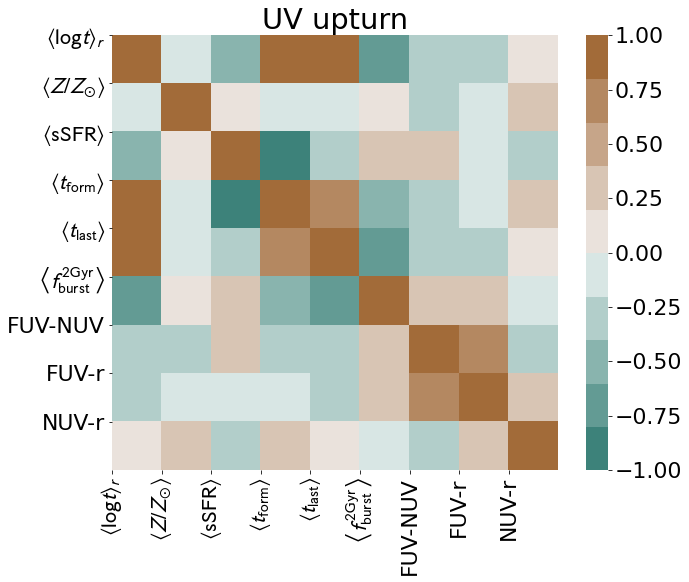

In [44]:
plt.rcParams.update(plotpars_hmp)
plt.subplots(figsize=(10,8))
ax = sns.heatmap(data=heatmap_upturn.corr(method='spearman'), cmap=cmap, vmin=-1., vmax=1.)
# labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xticks(ticks=np.arange(0,9,1), labels=[
#     r"$\logM_{\star}}$", 
                                            r"$\left< \log t \right>_{r}$", 
                                            r"$\left< Z/Z_{\odot} \right>$", 
                                            r"$\left< \rm{sSFR} \right>$",
                                            r"$\left< t_{\rm{form}}\right> $", 
                                            r"$\left< t_{\rm{last}} \right>$", 
                                            r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.yticks(ticks=np.arange(0,9,1), labels=[
#     r"$\logM_{\star}}$", 
                                            r"$\left< \log t \right>_{r}$", 
                                            r"$\left< Z/Z_{\odot} \right>$", 
                                            r"$\left< \rm{sSFR} \right>$",
                                            r"$\left< t_{\rm{form}}\right> $", 
                                            r"$\left< t_{\rm{last}} \right>$", 
                                            r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.title("UV upturn")
plt.savefig(os.path.join(psm_path, 'heatmap_upturn.pdf'))
plt.savefig(os.path.join(psm_path, 'heatmap_upturn.png'))
plt.show()

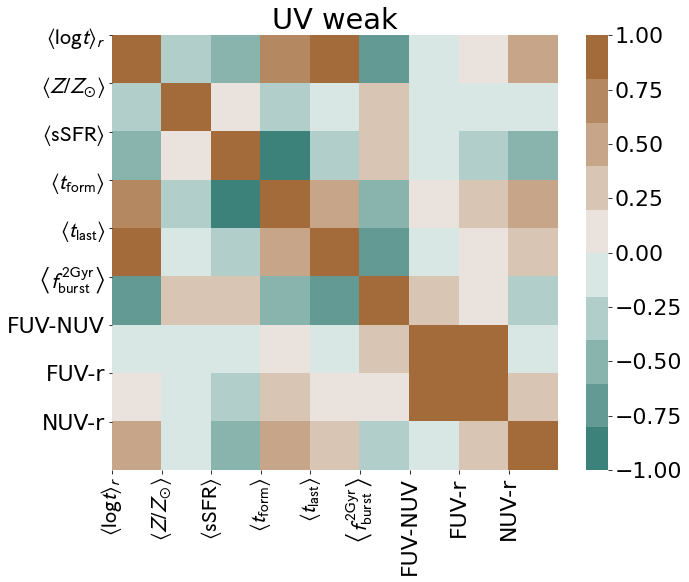

In [45]:
plt.rcParams.update(plotpars_hmp)
plt.subplots(figsize=(10,8))
# cmap = sns.diverging_palette(240, 10, n=9)
ax = sns.heatmap(data=heatmap_weak.corr(method='spearman'), cmap=cmap, vmin=-1., vmax=1.)
# labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xticks(ticks=np.arange(0,9,1), labels=[
#     r"$\logM_{\star}}$", 
                                            r"$\left< \log t \right>_{r}$", 
                                            r"$\left< Z/Z_{\odot} \right>$", 
                                            r"$\left< \rm{sSFR} \right>$",
                                            r"$\left< t_{\rm{form}}\right> $", 
                                            r"$\left< t_{\rm{last}} \right>$", 
                                            r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.yticks(ticks=np.arange(0,9,1), labels=[
#     r"$\logM_{\star}}$", 
                                            r"$\left< \log t \right>_{r}$", 
                                            r"$\left< Z/Z_{\odot} \right>$", 
                                            r"$\left< \rm{sSFR} \right>$",
                                            r"$\left< t_{\rm{form}}\right> $", 
                                            r"$\left< t_{\rm{last}} \right>$", 
                                            r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.title("UV weak")
plt.savefig(os.path.join(psm_path, 'heatmap_weak.pdf'))
plt.savefig(os.path.join(psm_path, 'heatmap_weak.png'))
plt.show()

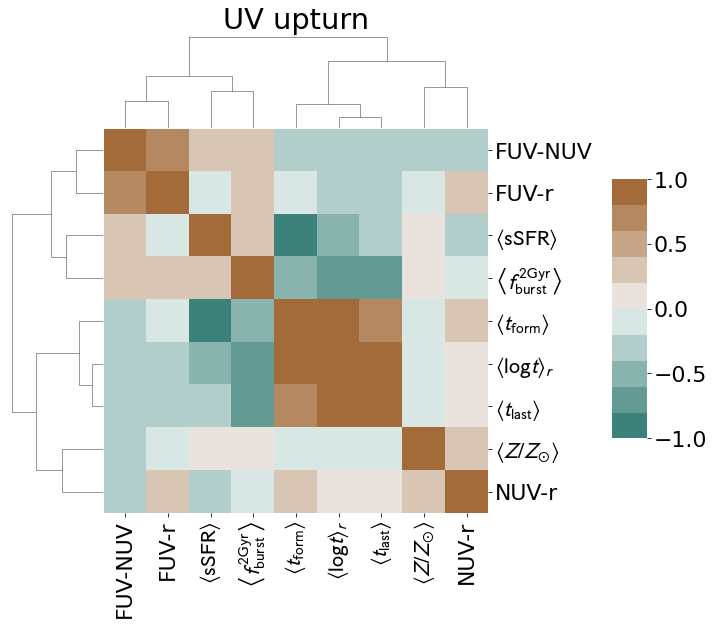

In [46]:
plt.rcParams.update(plotpars_cmp)
ax = sns.clustermap(data=heatmap_upturn.corr(method='spearman'), cmap=cmap, figsize=(12,12),  vmin=-1., vmax=1.)
ax.ax_heatmap.yaxis.set_ticklabels(['FUV-NUV', 
                                    'FUV-r', 
                                    r"$\left< \rm{sSFR} \right>$",
                                    r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                    r"$\left< t_{\rm{form}} \right>$", 
                                    r"$\left< \log t \right>_{r}$",
                                    r"$\left< t_{\rm{last}} \right>$",
                                    r"$\left< Z/Z_{\odot} \right>$",
                                    'NUV-r'])
ax.ax_heatmap.xaxis.set_ticklabels(['FUV-NUV', 
                                    'FUV-r', 
                                    r"$\left< \rm{sSFR} \right>$",
                                    r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
                                    r"$\left< t_{\rm{form}} \right>$", 
                                    r"$\left< \log t \right>_{r}$",
                                    r"$\left< t_{\rm{last}} \right>$",
                                    r"$\left< Z/Z_{\odot} \right>$",
                                    'NUV-r'])
ax.ax_cbar.set_position(pos=[0.73, 0.5, 0.04, 0.3], which='both')
ax.ax_heatmap.set_title("UV upturn", pad=100)
plt.savefig(os.path.join(psm_path, 'clustermap_upturn.pdf'))
plt.savefig(os.path.join(psm_path, 'clustermap_upturn.png'))
plt.show()

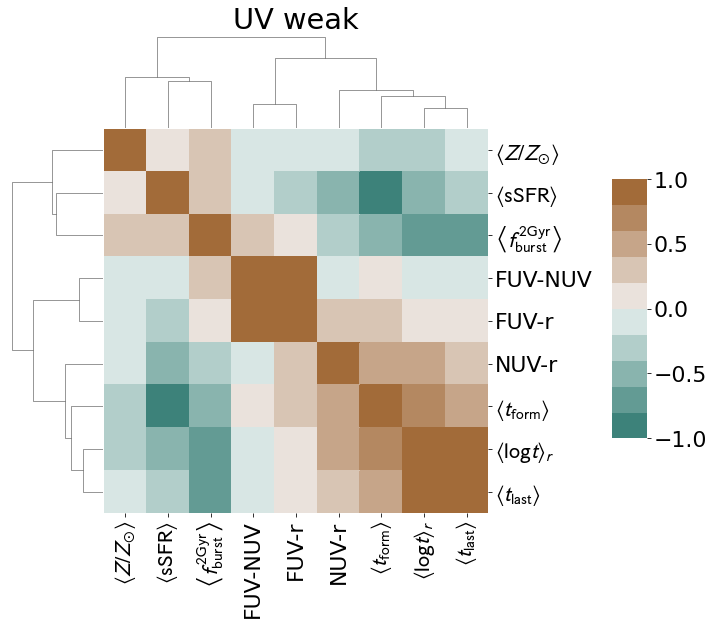

In [47]:
plt.rcParams.update(plotpars_cmp)
ax = sns.clustermap(data=heatmap_weak.corr(method='spearman'), cmap=cmap, figsize=(12,12),  vmin=-1., vmax=1.)
ax.ax_heatmap.yaxis.set_ticklabels([r"$\left<Z/Z_{\odot}\right>$",
                                    r"$\left< \rm{sSFR} \right>$",
                                    r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$",
                                    'FUV-NUV', 
                                    'FUV-r',
                                    'NUV-r',
                                    r"$\left< t_{\rm{form}} \right>$",
                                    r"$\left< \log t \right>_{r}$",
                                    r"$\left< t_{\rm{last}} \right>$"])
ax.ax_heatmap.xaxis.set_ticklabels([r"$\left<Z/Z_{\odot}\right>$",
                                    r"$\left< \rm{sSFR} \right>$",
                                    r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$",
                                    'FUV-NUV', 
                                    'FUV-r',
                                    'NUV-r',
                                    r"$\left< t_{\rm{form}} \right>$",
                                    r"$\left< \log t \right>_{r}$",
                                    r"$\left< t_{\rm{last}} \right>$"])
ax.ax_cbar.set_position(pos=[0.73, 0.5, 0.04, 0.3], which='both')
ax.ax_heatmap.set_title("UV weak", pad=100)
plt.savefig(os.path.join(psm_path, 'clustermap_weak.pdf'))
plt.savefig(os.path.join(psm_path, 'clustermap_weak.png'))
plt.show()

In [48]:
heatmap_upturn.corr(method='spearman').round(decimals=2)

,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
ager_percentile50,1.00,-0.08,-0.54,0.81,0.93,-0.72,-0.32,-0.29,0.11
metalicity_Z_Zo_percentile50,-0.08,1.00,0.08,-0.06,-0.00,0.03,-0.24,-0.05,0.30
sSFR_0_1Gyr_percentile50,-0.54,0.08,1.00,-0.83,-0.31,0.40,0.22,-0.02,-0.37
tform_percentile50,0.81,-0.06,-0.83,1.00,0.63,-0.54,-0.27,-0.12,0.27
tlastb_percentile50,0.93,-0.00,-0.31,0.63,1.00,-0.74,-0.32,-0.33,0.05
fb29_percentile50,-0.72,0.03,0.40,-0.54,-0.74,1.00,0.32,0.24,-0.12
FUV-NUV,-0.32,-0.24,0.22,-0.27,-0.32,0.32,1.00,0.75,-0.34
FUV-R,-0.29,-0.05,-0.02,-0.12,-0.33,0.24,0.75,1.00,0.29
NUV-R,0.11,0.30,-0.37,0.27,0.05,-0.12,-0.34,0.29,1.00


In [49]:
heatmap_weak.corr(method='spearman').round(decimals=2)

,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
ager_percentile50,1.00,-0.36,-0.57,0.73,0.82,-0.74,-0.01,0.14,0.42
metalicity_Z_Zo_percentile50,-0.36,1.00,0.12,-0.24,-0.10,0.21,-0.09,-0.15,-0.16
sSFR_0_1Gyr_percentile50,-0.57,0.12,1.00,-0.87,-0.25,0.28,-0.00,-0.21,-0.42
tform_percentile50,0.73,-0.24,-0.87,1.00,0.42,-0.40,0.01,0.20,0.42
tlastb_percentile50,0.82,-0.10,-0.25,0.42,1.00,-0.76,-0.06,0.08,0.36
fb29_percentile50,-0.74,0.21,0.28,-0.40,-0.76,1.00,0.32,0.16,-0.32
FUV-NUV,-0.01,-0.09,-0.00,0.01,-0.06,0.32,1.00,0.82,-0.14
FUV-R,0.14,-0.15,-0.21,0.20,0.08,0.16,0.82,1.00,0.38
NUV-R,0.42,-0.16,-0.42,0.42,0.36,-0.32,-0.14,0.38,1.00


In [50]:
uv_pal = ['#dfc27d', '#a6611a']

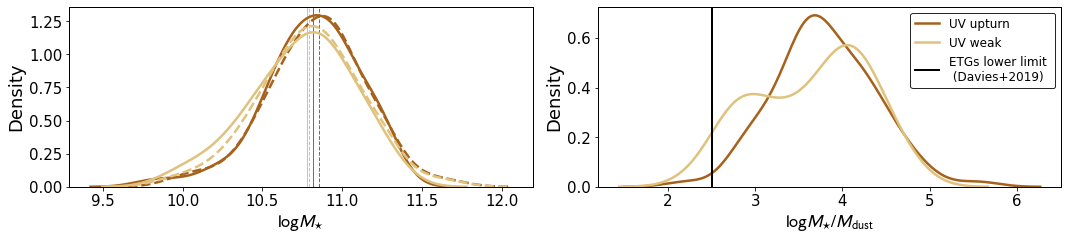

In [51]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
plt.axvline(x=np.median(np.log10(uv_upturn['mass_stellar_best_fit_x'].values)), color=uv_pal[1], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_upturn['logmstar']), color=uv_pal[1], linestyle='--', lw=1, alpha=1.)
plt.axvline(x=np.median(np.log10(uv_weak['mass_stellar_best_fit_x'].values)), color=uv_pal[0], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_weak['logmstar']), color=uv_pal[0], linestyle='--', lw=1., alpha=1.)

sns.kdeplot(np.log10(uv_upturn['mass_stellar_best_fit_x'].values), label='UV upturn (DC+08)', color=uv_pal[1], 
            lw=2.5, alpha=1.)
sns.kdeplot(uv_upturn['logmstar'].values, label='UV upturn (T+11)', color=uv_pal[1], linestyle='--', lw=2.5, 
            alpha=1.)
sns.kdeplot(np.log10(uv_weak['mass_stellar_best_fit_x'].values), label='UV weak (DC+08)', color=uv_pal[0], lw=2.5, 
            alpha=1.)
sns.kdeplot(uv_weak['logmstar'].values, label='UV weak (T+11)', color=uv_pal[0], linestyle='--', lw=2.5, alpha=1.)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 

plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], lw=2.5, alpha=1.)
sns.kdeplot(uv_weak['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=1.)
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)', alpha=1.)
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'dust_masses_psmed.png'))
plt.savefig(os.path.join(psm_path, 'dust_masses_psmed.pdf'))
plt.show()

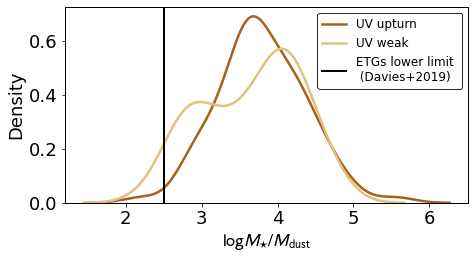

In [52]:
plt.rcParams.update(plotpars)
plt.subplots(figsize=(7,4))

sns.kdeplot(uv_upturn['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], lw=2.5, alpha=1.)
sns.kdeplot(uv_weak['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=1.)
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)', alpha=1.)
plt.ylabel(r"Density")
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'dust_psmed.png'))
plt.savefig(os.path.join(psm_path, 'dust_psmed.pdf'))
plt.show()

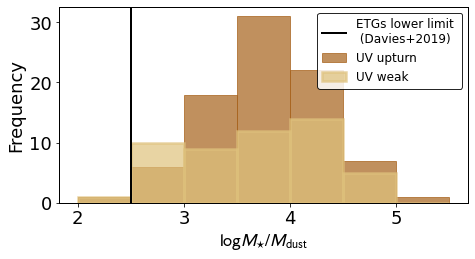

In [53]:
plt.rcParams.update(plotpars)
plt.subplots(figsize=(7,4))

plt.hist(uv_upturn['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], alpha=0.7, bins=np.arange(2, 6, 0.5), 
         edgecolor=uv_pal[1])
plt.hist(uv_weak['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=0.7, 
         bins=np.arange(2, 6, 0.5), edgecolor=uv_pal[0])
# sns.kdeplot(uv_upturn['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], lw=2.5, alpha=1.)
# sns.kdeplot(uv_weak['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=1.)
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)', alpha=1.)
plt.ylabel(r"Frequency")
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'dust_psmed.png'))
plt.savefig(os.path.join(psm_path, 'dust_psmed.pdf'))
plt.show()

In [54]:
uv_upturn[uv_upturn['log_mdust/mstar']<2.5]

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile97_5_y,mass_dust_best_fit_y,mass_dust_percentile2_5_y,mass_dust_percentile16_y,mass_dust_percentile50_y,mass_dust_percentile84_y,mass_dust_percentile97_5_y,mass_fraction,log_mdust/mstar,_merge
54,47685,587722982291734753,213.7843,-0.79686,3.5,5.28,21.0743,0.1385,0,19.1791,...,11.14,220800000.0,7.837,7.992,8.172,8.342,8.372,0.006181,2.206229,both


In [55]:
uv_weak[uv_weak['log_mdust/mstar']<2.5]

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile97_5_y,mass_dust_best_fit_y,mass_dust_percentile2_5_y,mass_dust_percentile16_y,mass_dust_percentile50_y,mass_dust_percentile84_y,mass_dust_percentile97_5_y,mass_fraction,log_mdust/mstar,_merge
122,107237,587722984441512111,218.9876,0.9855,3.5,4.62,20.5285,0.0443,2,18.9303,...,10.42,160900000.0,7.907,8.062,8.182,8.257,8.307,0.004717,2.324284,both


In [56]:
for i in range(uv_upturn['log_mdust/mstar'].values.size):
    if uv_upturn['log_mdust/mstar'].iloc[i]<=2.5:
        print(uv_upturn['log_mdust/mstar'].iloc[i])

2.2062292717642853


In [57]:
for i in range(uv_weak['log_mdust/mstar'].values.size):
    if uv_weak['log_mdust/mstar'].iloc[i]<=2.5:
        print(uv_weak['log_mdust/mstar'].iloc[i])

2.3242837230045295


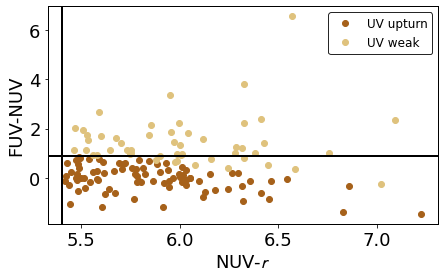

In [58]:
plt.rcParams.update(plotpars)
plt.subplots(figsize=(7,4))
plot01, = plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'],
                   'o', markersize=6, color=palette[1], alpha=1, label="UV upturn")
plot02, = plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'],
                   'o', markersize=6, color = palette[0], alpha=1, label="UV weak")
plt.legend(loc='best')
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.0, xmax=20, color='black', linewidth=2.)
plt.xlabel(r"NUV-$r$")
plt.ylabel(r"FUV-NUV")
plt.savefig(os.path.join(psm_path, 'yi_diagram_psm.pdf'))
plt.savefig(os.path.join(psm_path, 'yi_diagram_psm.png'))
plt.show()

/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

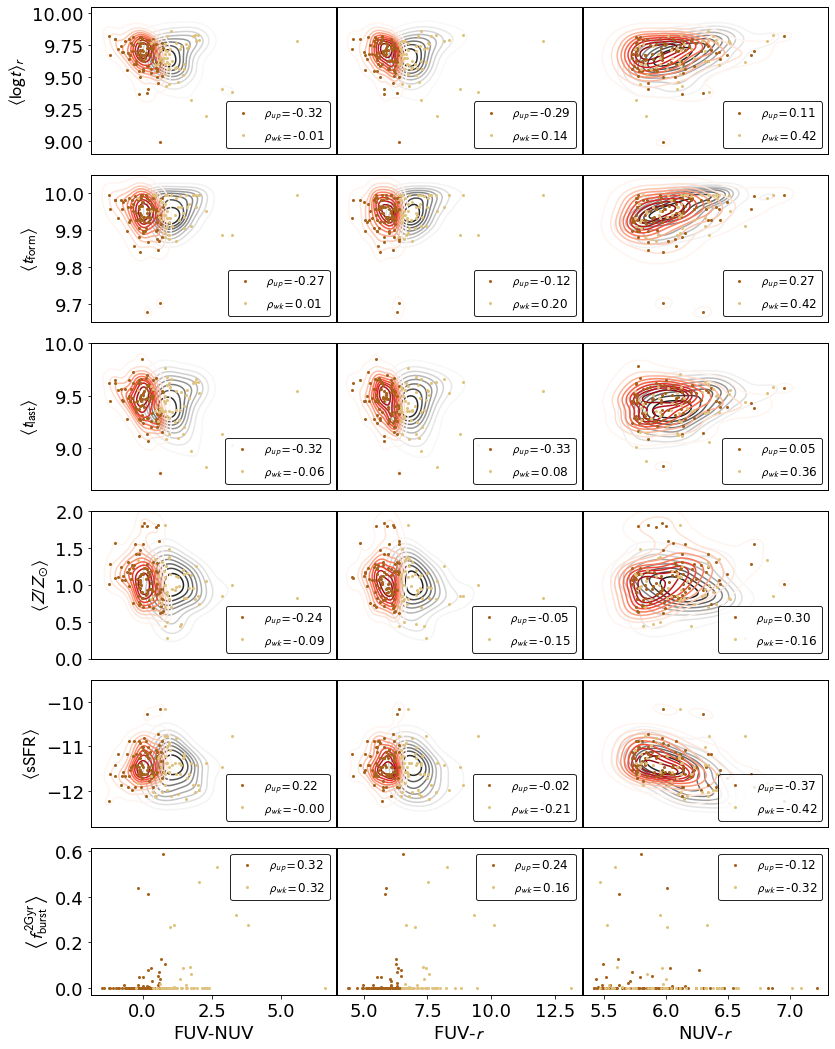

In [59]:
plt.subplots(figsize=(12, 15))

# first row ------------------------------------------------------------------------------------------------------
p1 = plt.subplot(6, 3, 1)
sct1a, = plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['ager_percentile50'],  'o', 
                 markersize=2., color=palette[1], alpha=1, label= r"$\rho_{up}=$%.2f" % 
                 s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['ager_percentile50'])[0])
sct1b, = plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['ager_percentile50'],  'o', markersize=2., 
                 color=palette[0], alpha=1, label= r"$\rho_{wk}=$%.2f" % 
                 s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['ager_percentile50'])[0])
kde1a = sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['ager_percentile50'], cmap="Greys")
kde1b = sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['ager_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([8.9, 10.05])
plt.ylabel(r"$\left< \log t \right>_r$")
plt.yticks([9., 9.25, 9.50, 9.75, 10.])
p1.xaxis.set_visible(False)

p2 = plt.subplot(6, 3, 2)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'],  'o', color=palette[1], 
         markersize=2., label= r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([8.9, 10.05])
p2.xaxis.set_visible(False)
p2.yaxis.set_visible(False)

p3 = plt.subplot(6, 3, 3)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'],  'o', color=palette[0],
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'])[0])
plt.legend(loc='lower right')
sns.kdeplot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['ager_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['ager_percentile50'], cmap="Reds")
plt.ylim([8.9, 10.05])
p3.xaxis.set_visible(False)
p3.yaxis.set_visible(False)

# second row -----------------------------------------------------------------------------------------------------
p4 = plt.subplot(6, 3, 4)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tform_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tform_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tform_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tform_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tform_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tform_percentile50'], cmap="Reds")
plt.ylabel(r"$\left< t_{\rm{form}} \right>$")
plt.legend(loc='lower right')
plt.ylim([9.65, 10.05])
plt.yticks([9.7, 9.8, 9.9, 10.])
p4.xaxis.set_visible(False)

p5 = plt.subplot(6, 3, 5)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([9.65, 10.05])
p5.xaxis.set_visible(False)
p5.yaxis.set_visible(False)

p6 = plt.subplot(6, 3, 6)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tform_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tform_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([9.65, 10.05])
p6.xaxis.set_visible(False)
p6.yaxis.set_visible(False)

# third row -----------------------------------------------------------------------------------------------------
p7 = plt.subplot(6, 3, 7)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tlastb_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tlastb_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tlastb_percentile50'],  'o', color=palette[0], 
        markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tlastb_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['tlastb_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['tlastb_percentile50'], cmap="Reds")
plt.ylabel(r"$\left< t_{\rm{last}} \right>$")
plt.legend(loc='lower right')
plt.ylim([8.6, 10.0])
p7.xaxis.set_visible(False)

p8 = plt.subplot(6, 3, 8)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'],  'o', color=palette[1],
        markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'],  'o', color=palette[0],
        markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([8.6, 10.0])
p8.xaxis.set_visible(False)
p8.yaxis.set_visible(False)

p9 = plt.subplot(6, 3, 9)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'],  'o', color=palette[1],
        markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'],  'o', color=palette[0],
        markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['tlastb_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['tlastb_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
p9.xaxis.set_visible(False)
p9.yaxis.set_visible(False)

# forth row -----------------------------------------------------------------------------------------------------
p10 = plt.subplot(6, 3, 10)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], 
                     uv_upturn['metalicity_Z_Zo_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['metalicity_Z_Zo_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['metalicity_Z_Zo_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['metalicity_Z_Zo_percentile50'], 
            cmap="Reds")
plt.ylabel(r"$\left<Z/Z_{\odot}\right>$")
plt.legend(loc='lower right')
plt.ylim([0, 2])
p10.xaxis.set_visible(False)

p11 = plt.subplot(6, 3, 11)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([0, 2])
p11.xaxis.set_visible(False)
p11.yaxis.set_visible(False)

p12 = plt.subplot(6, 3, 12)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['metalicity_Z_Zo_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['metalicity_Z_Zo_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([0, 2])
p12.xaxis.set_visible(False)
p12.yaxis.set_visible(False)

# fifth row -----------------------------------------------------------------------------------------------------
p13 = plt.subplot(6, 3, 13)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['sSFR_0_1Gyr_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['sSFR_0_1Gyr_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['sSFR_0_1Gyr_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['sSFR_0_1Gyr_percentile50'], cmap="Reds")
plt.ylabel(r"$\left< \rm{sSFR} \right>$")
plt.legend(loc='lower right')
plt.ylim([-12.8, -9.5])
p13.xaxis.set_visible(False)

p14 = plt.subplot(6, 3, 14)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([-12.8, -9.5])
p14.xaxis.set_visible(False)
p14.yaxis.set_visible(False)

p15 = plt.subplot(6, 3, 15)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[1], markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'],  'o', 
         color=palette[0], markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'])[0])
sns.kdeplot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['sSFR_0_1Gyr_percentile50'], cmap="Greys")
sns.kdeplot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['sSFR_0_1Gyr_percentile50'], cmap="Reds")
plt.legend(loc='lower right')
plt.ylim([-12.8, -9.5])
p15.xaxis.set_visible(False)
p15.yaxis.set_visible(False)

# sixth row -----------------------------------------------------------------------------------------------------
p16 = plt.subplot(6, 3, 16)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['fb29_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], uv_upturn['fb29_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['fb29_percentile50'],  'o', color=palette[0], 
        markersize=2., label=r"$\rho_{wk}=$%.2f" % 
        s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], uv_weak['fb29_percentile50'])[0])
plt.legend(loc='upper right')
plt.ylabel(r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$")
plt.xlabel("FUV-NUV")

p17 = plt.subplot(6, 3, 17)
plt.plot(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['fb29_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], uv_upturn['fb29_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['fb29_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], uv_weak['fb29_percentile50'])[0])
plt.legend(loc='upper right')
p17.yaxis.set_visible(False)
plt.xlabel("FUV-$r$")

p18 = plt.subplot(6, 3, 18)
plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['fb29_percentile50'],  'o', color=palette[1], 
         markersize=2., label=r"$\rho_{up}=$%.2f" % 
         s.spearmanr(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['fb29_percentile50'])[0])
plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['fb29_percentile50'],  'o', color=palette[0], 
         markersize=2., label=r"$\rho_{wk}=$%.2f" % 
         s.spearmanr(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['fb29_percentile50'])[0])
plt.legend(loc='upper right')
p18.yaxis.set_visible(False)
plt.xlabel("NUV-$r$")


plt.tight_layout(w_pad=-0.1, h_pad=0.5)
plt.savefig(os.path.join(psm_path, 'colours_correlations.pdf'))
plt.savefig(os.path.join(psm_path, 'colours_correlations.png'))
plt.show()

In [60]:
np.mean(uv_weak['fb19_percentile50'].values)

0.010696078431372547

In [61]:
np.mean(uv_upturn['fb19_percentile50'].values)

0.007224137931034473

/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


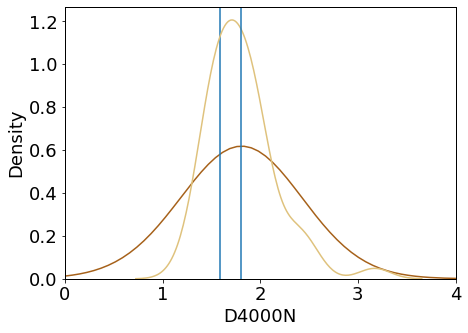

In [62]:
plt.rcParams.update(plotpars)
sns.kdeplot(uv_upturn['D4000N'], color=palette[1], kernel='gau')
plt.axvline(np.mean(uv_upturn['D4000N'].values))
sns.kdeplot(uv_weak['D4000N'], color=palette[0], kernel='gau')
plt.axvline(np.mean(uv_weak['D4000N'].values))
plt.xlim([0, 4])
plt.show()

In [63]:
print(np.mean(uv_upturn['D4000N'].values))
print(np.mean(uv_weak['D4000N'].values))

1.590893118390805
1.8073092156862742


In [64]:
print(np.median(uv_upturn['D4000N'].values))
print(np.median(uv_weak['D4000N'].values))

1.811078
1.770343


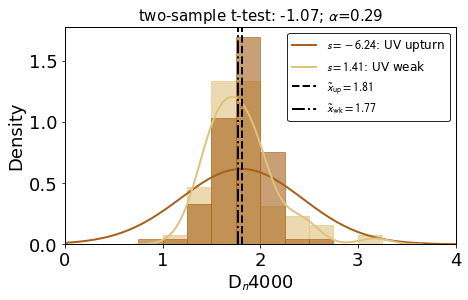

In [65]:
plt.rcParams.update(plotpars)
plt.subplots(figsize=(7,4))
plt.hist(uv_weak['D4000N'], color=palette[0], alpha=0.6, bins=np.arange(0, 4, 0.25), density=True, 
         edgecolor=palette[0])
plt.hist(uv_upturn['D4000N'], color=palette[1], alpha=0.6, bins=np.arange(0, 4, 0.25), density=True, 
         edgecolor=palette[1])
sns.kdeplot(uv_upturn['D4000N'], color=palette[1], label=r"$s=%.2f$: UV upturn" % uv_upturn['D4000N'].skew(), lw=2)
sns.kdeplot(uv_weak['D4000N'], color=palette[0], label=r"$s=%.2f$: UV weak" % uv_weak['D4000N'].skew(), lw=2)
plt.axvline(np.median(uv_upturn['D4000N'].values), color='black', linestyle='--', lw=2, 
            label=r"$\~x_{\rm{up}} = %.2f$" % np.median(uv_upturn['D4000N'].values))
plt.axvline(np.median(uv_weak['D4000N'].values), color='black', linestyle='-.', lw=2, 
           label=r"$\~x_{\rm{wk}} = %.2f$" % np.median(uv_weak['D4000N'].values), alpha=2)
ttest = s.ttest_ind(a=uv_upturn['D4000N'], b=uv_weak['D4000N'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]), fontsize=15)
plt.legend()
plt.xlabel(r"D$_n$4000")
plt.ylabel(r"Density")
plt.xlim([0, 4])
plt.savefig(os.path.join(psm_path, 'dn4000.png'))
plt.savefig(os.path.join(psm_path, 'dn4000.pdf'))
plt.show()

In [66]:
for i in psmed_data_magphys.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

(-1.0, 1.0)

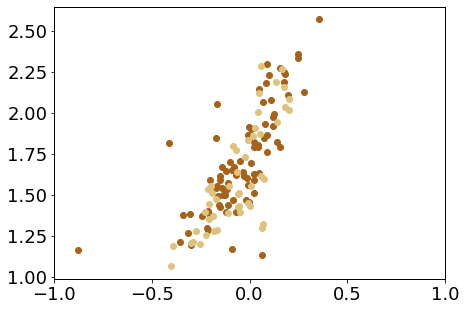

In [67]:
plt.plot(uv_upturn['MAG_AB_H']-uv_upturn['MAG_AB_K'], uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R'], 'o',
                                                       color=palette[1])
plt.plot(uv_weak['MAG_AB_H']-uv_weak['MAG_AB_K'], uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R'], 'o', color=palette[0])
plt.xlim([-1,1])
# plt.ylim([-1, 1])

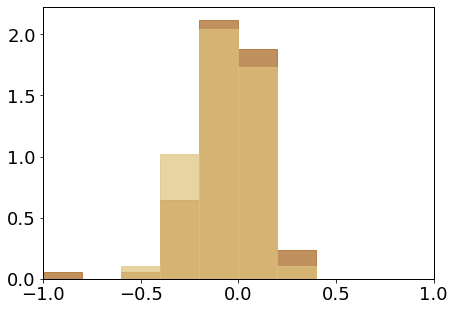

In [68]:
plt.hist(uv_upturn['MAG_AB_H']-uv_upturn['MAG_AB_K'], bins=np.arange(-1, 1, 0.2), color=palette[1], alpha=0.7, 
         density=True, edgecolor=palette[1])
plt.hist(uv_weak['MAG_AB_H']-uv_weak['MAG_AB_K'], bins=np.arange(-1, 1, 0.2), color=palette[0], alpha=0.7, 
         density=True, edgecolor=palette[0])
# sns.kdeplot(uv_upturn['MAG_AB_H']-uv_upturn['MAG_AB_K'], color='black')
plt.xlim([-1,1])
plt.show()

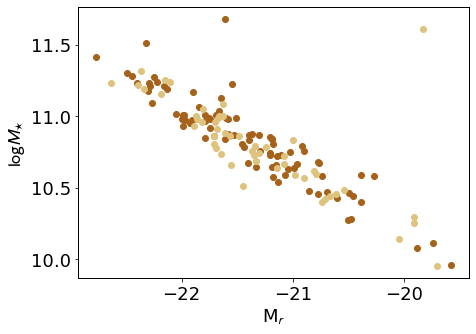

In [69]:
plt.plot(uv_upturn['MAG_ABSOLUTE_R'], uv_upturn['logmstar'], 'o', color=palette[1])
plt.plot(uv_weak['MAG_ABSOLUTE_R'], uv_weak['logmstar'], 'o', color=palette[0])
plt.xlabel(r"M$_r$")
plt.ylabel(r"$\log M_{\star}$")
plt.show()

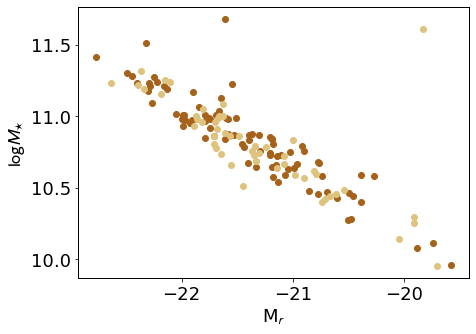

In [70]:
plt.plot(uv_upturn['MAG_ABSOLUTE_R'], uv_upturn['logmstar'], 'o', color=palette[1])
plt.plot(uv_weak['MAG_ABSOLUTE_R'], uv_weak['logmstar'], 'o', color=palette[0])
plt.xlabel(r"M$_r$")
plt.ylabel(r"$\log M_{\star}$")
plt.show()

In [71]:
size_up = np.exp(uv_upturn['metalicity_Z_Zo_percentile50'].values)**3
size_wk = np.exp(uv_weak['metalicity_Z_Zo_percentile50'].values)**3

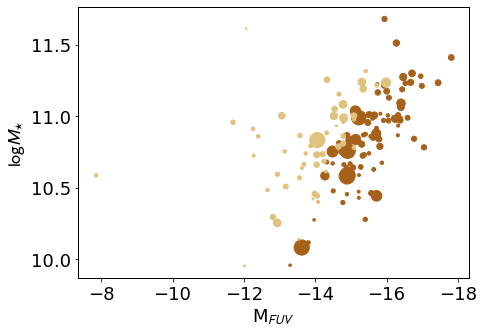

In [72]:
plt.scatter(uv_upturn['MAG_ABSOLUTE_FUV'], uv_upturn['logmstar'], color=palette[1], s=size_up)
plt.scatter(uv_weak['MAG_ABSOLUTE_FUV'], uv_weak['logmstar'], color=palette[0], s=size_wk)
plt.xlabel(r"M$_{FUV}$")
plt.ylabel(r"$\log M_{\star}$")
plt.gca().invert_xaxis()
plt.show()

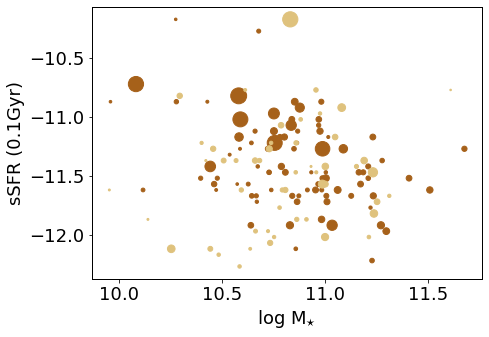

In [73]:
plt.scatter(uv_upturn['logmstar'], uv_upturn['sSFR_0_1Gyr_percentile50'], color=uv_pal[1], s=size_up)
plt.scatter(uv_weak['logmstar'], uv_weak['sSFR_0_1Gyr_percentile50'], color=uv_pal[0], s=size_wk)
plt.xlabel(r"log M$_{\star}$")
plt.ylabel(r"sSFR (0.1Gyr)")
plt.show()

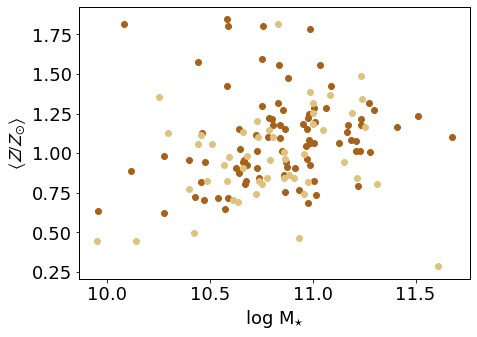

In [74]:
plt.scatter(uv_upturn['logmstar'], uv_upturn['metalicity_Z_Zo_percentile50'], color=uv_pal[1] )
plt.scatter(uv_weak['logmstar'], uv_weak['metalicity_Z_Zo_percentile50'], color=uv_pal[0])
plt.xlabel(r"log M$_{\star}$")
plt.ylabel(r"$\left< Z/Z_{\odot} \right>$")
plt.show()

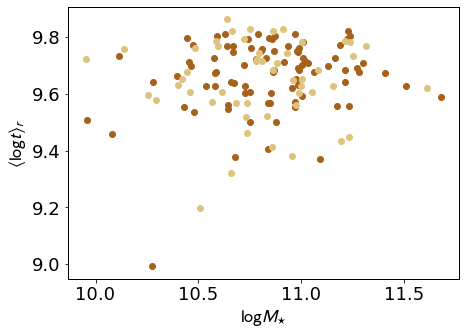

In [75]:
plt.plot(uv_upturn['logmstar'], uv_upturn['ager_percentile50'], 'o', color=uv_pal[1])
plt.plot(uv_weak['logmstar'], uv_weak['ager_percentile50'], 'o', color=uv_pal[0])
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\left< \log t \right>_r$")
plt.show()

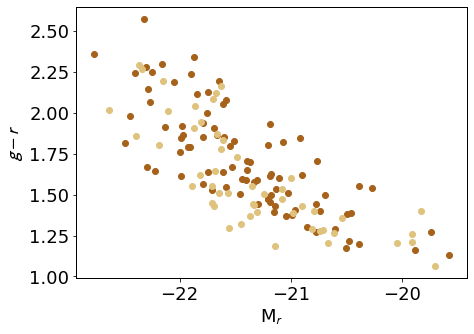

In [76]:
plt.plot(uv_upturn['MAG_ABSOLUTE_R'], uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R'], 'o', color=uv_pal[1])
plt.plot(uv_weak['MAG_ABSOLUTE_R'], uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R'], 'o', color=uv_pal[0])
plt.xlabel(r"M$_r$")
plt.ylabel(r"$g-r$")
plt.show()

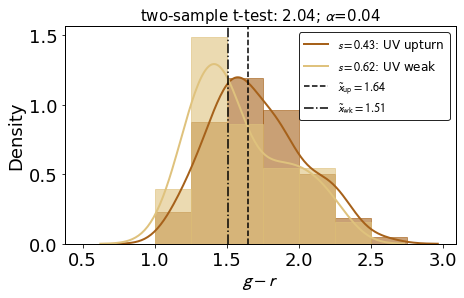

In [77]:
plt.subplots(figsize=(7,4))
h1 = plt.hist(uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R'], color=uv_pal[1], alpha=0.6, density=True, 
         bins=np.arange(0.5, 3, 0.25), edgecolor=uv_pal[1])
h2 = plt.hist(uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R'], color=uv_pal[0], alpha=0.6, density=True, 
         bins=np.arange(0.5, 3, 0.25), edgecolor=uv_pal[0])
k1 = sns.kdeplot(uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R'], color=uv_pal[1], label=r"$s=%.2f$: UV upturn" 
              % (uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R']).skew(), lw=2.)
k2 = sns.kdeplot(uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R'], color=uv_pal[0], label=r"$s=%.2f$: UV weak" 
              % (uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R']).skew(), lw=2.)
v1 = plt.axvline(np.median(uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R']), linestyle='--', color='black', 
                 label=r"$\tilde{x}_{\rm{up}}=%.2f$" % np.median(uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R']))
v2 = plt.axvline(np.median(uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R']), linestyle='-.', color='black', 
                 label=r"$\tilde{x}_{\rm{wk}}=%.2f$" % np.median(uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R']))
ttest = s.ttest_ind(a=uv_upturn['MAG_AB_G']-uv_upturn['MAG_AB_R'], b=uv_weak['MAG_AB_G']-uv_weak['MAG_AB_R'])
plt.title(r"two-sample t-test: %.2f; $\alpha$=%.2f" % (ttest[0], ttest[1]), fontsize=15)
plt.legend()
plt.xlabel(r"$g-r$")
plt.ylabel(r"Density")
plt.savefig(os.path.join(psm_path, 'psm_gr_color.png'))
plt.savefig(os.path.join(psm_path, 'psm_gr_color.pdf'))
plt.show()

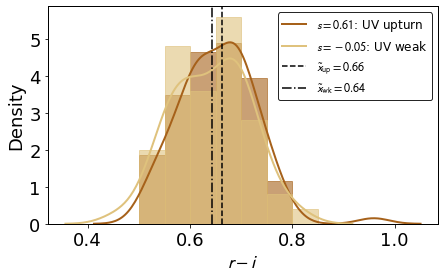

In [78]:
plt.subplots(figsize=(7,4))
h1 = plt.hist(uv_upturn['MAG_AB_R']-uv_upturn['MAG_AB_I'], color=uv_pal[1], alpha=0.6, density=True, 
         bins=np.arange(0.5, 1, 0.05), edgecolor=uv_pal[1])
h2 = plt.hist(uv_weak['MAG_AB_R']-uv_weak['MAG_AB_I'], color=uv_pal[0], alpha=0.6, density=True, 
         bins=np.arange(0.5, 1, 0.05), edgecolor=uv_pal[0])
k1 = sns.kdeplot(uv_upturn['MAG_AB_R']-uv_upturn['MAG_AB_I'], color=uv_pal[1], label=r"$s=%.2f$: UV upturn" 
              % (uv_upturn['MAG_AB_R']-uv_upturn['MAG_AB_I']).skew(), lw=2.)
k2 = sns.kdeplot(uv_weak['MAG_AB_R']-uv_weak['MAG_AB_I'], color=uv_pal[0], label=r"$s=%.2f$: UV weak" 
              % (uv_weak['MAG_AB_R']-uv_weak['MAG_AB_I']).skew(), lw=2.)
v1 = plt.axvline(np.median(uv_upturn['MAG_AB_R']-uv_upturn['MAG_AB_I']), linestyle='--', color='black', 
                 label=r"$\tilde{x}_{\rm{up}}=%.2f$" % np.median(uv_upturn['MAG_AB_R']-uv_upturn['MAG_AB_I']))
v2 = plt.axvline(np.median(uv_weak['MAG_AB_R']-uv_weak['MAG_AB_I']), linestyle='-.', color='black', 
                 label=r"$\tilde{x}_{\rm{wk}}=%.2f$" % np.median(uv_weak['MAG_AB_R']-uv_weak['MAG_AB_I']))
plt.legend()
plt.xlabel(r"$r-i$")
plt.ylabel(r"Density")
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.png'))
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.pdf'))
plt.show()

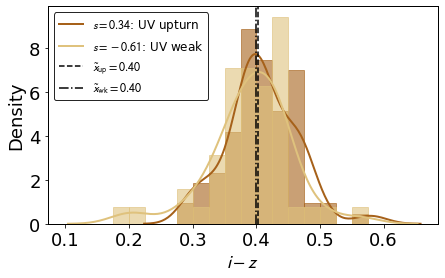

In [79]:
plt.subplots(figsize=(7,4))
h1 = plt.hist(uv_upturn['MAG_AB_I']-uv_upturn['MAG_AB_Z'], color=uv_pal[1], alpha=0.6, density=True, 
         bins=np.arange(0.1, 0.6, 0.025), edgecolor=uv_pal[1])
h2 = plt.hist(uv_weak['MAG_AB_I']-uv_weak['MAG_AB_Z'], color=uv_pal[0], alpha=0.6, density=True, 
         bins=np.arange(0.1, 0.6, 0.025), edgecolor=uv_pal[0])
k1 = sns.kdeplot(uv_upturn['MAG_AB_I']-uv_upturn['MAG_AB_Z'], color=uv_pal[1], label=r"$s=%.2f$: UV upturn" 
              % (uv_upturn['MAG_AB_I']-uv_upturn['MAG_AB_Z']).skew(), lw=2.)
k2 = sns.kdeplot(uv_weak['MAG_AB_I']-uv_weak['MAG_AB_Z'], color=uv_pal[0], label=r"$s=%.2f$: UV weak" 
              % (uv_weak['MAG_AB_I']-uv_weak['MAG_AB_Z']).skew(), lw=2.)
v1 = plt.axvline(np.median(uv_upturn['MAG_AB_I']-uv_upturn['MAG_AB_Z']), linestyle='--', color='black', 
                 label=r"$\tilde{x}_{\rm{up}}=%.2f$" % np.median(uv_upturn['MAG_AB_I']-uv_upturn['MAG_AB_Z']))
v2 = plt.axvline(np.median(uv_weak['MAG_AB_I']-uv_weak['MAG_AB_Z']), linestyle='-.', color='black', 
                 label=r"$\tilde{x}_{\rm{wk}}=%.2f$" % np.median(uv_weak['MAG_AB_I']-uv_weak['MAG_AB_Z']))
plt.legend()
plt.xlabel(r"$i-z$")
plt.ylabel(r"Density")
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.png'))
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.pdf'))
plt.show()

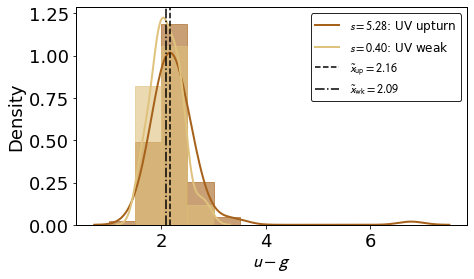

In [80]:
plt.subplots(figsize=(7,4))
h1 = plt.hist(uv_upturn['MAG_AB_U']-uv_upturn['MAG_AB_G'], color=uv_pal[1], alpha=0.6, density=True, 
         bins=np.arange(1, 7, 0.5), edgecolor=uv_pal[1])
h2 = plt.hist(uv_weak['MAG_AB_U']-uv_weak['MAG_AB_G'], color=uv_pal[0], alpha=0.6, density=True, 
         bins=np.arange(1, 7, 0.5), edgecolor=uv_pal[0])
k1 = sns.kdeplot(uv_upturn['MAG_AB_U']-uv_upturn['MAG_AB_G'], color=uv_pal[1], label=r"$s=%.2f$: UV upturn" 
              % (uv_upturn['MAG_AB_U']-uv_upturn['MAG_AB_G']).skew(), lw=2.)
k2 = sns.kdeplot(uv_weak['MAG_AB_U']-uv_weak['MAG_AB_G'], color=uv_pal[0], label=r"$s=%.2f$: UV weak" 
              % (uv_weak['MAG_AB_U']-uv_weak['MAG_AB_G']).skew(), lw=2.)
v1 = plt.axvline(np.median(uv_upturn['MAG_AB_U']-uv_upturn['MAG_AB_G']), linestyle='--', color='black', 
                 label=r"$\tilde{x}_{\rm{up}}=%.2f$" % np.median(uv_upturn['MAG_AB_U']-uv_upturn['MAG_AB_G']))
v2 = plt.axvline(np.median(uv_weak['MAG_AB_U']-uv_weak['MAG_AB_G']), linestyle='-.', color='black', 
                 label=r"$\tilde{x}_{\rm{wk}}=%.2f$" % np.median(uv_weak['MAG_AB_U']-uv_weak['MAG_AB_G']))
plt.legend()
plt.xlabel(r"$u-g$")
plt.ylabel(r"Density")
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.png'))
# plt.savefig(os.path.join(psm_path, 'psm_gr_color.pdf'))
plt.show()